In [1]:
import hemingway.pos
import nltk.corpus
from datetime import datetime
from nltk.tag import pos_tag
import matplotlib.pyplot as plt

In [2]:
tags = ["NOUN", "VERB", "ADJ", "ADP", "ADV", "PRON", "DET", "NUM", "CONJ", "PRT", "?", "X", "."]

In [3]:
def benchmark(corpus: str, tags: list[str], unknown_probs: dict, log: bool = True):
    hw_correct = 0
    hw_wrong = 0
    nltk_correct  = 0
    nltk_wrong = 0
    total = 0
    hw_time = 0
    nltk_time = 0
    print_step = 1000
    
    hw_error_matrix = []
    nltk_error_matrix = []
    for i in range(0, len(tags)):
        hw_error_matrix.append([0] * len(tags))
        nltk_error_matrix.append([0] * len(tags))

    sents = getattr(nltk.corpus, corpus).tagged_sents(tagset='universal')
    sent_total = len(sents)
    
    if log:
        print(f'Processing {corpus} corpus')
        print(f'    Processing sentence 1 of {sent_total}...')
    
    for sent_index, sent in enumerate(sents):

        if (sent_index + 1) % print_step == 0:
            if log:
                print(f'    Processing sentence {sent_index+1} of {sent_total}...')

        tokens = [token[0] for token in sent]

        start = datetime.now()
        hw_tagged = hemingway.pos.tag_tokens(tokens, unknown_probs)
        end = datetime.now()
        hw_time += (end - start).total_seconds()

        start = datetime.now()
        nltk_tagged = pos_tag(tokens, tagset='universal')
        end = datetime.now()
        nltk_time += (end - start).total_seconds()

        for idx, part in enumerate(sent):
            if hw_tagged[idx][1] == part[1]:
                hw_correct += 1
            else:
                hw_wrong += 1
                hw_guess = tags.index(hw_tagged[idx][1])
                correct = tags.index(part[1])
                hw_error_matrix[hw_guess][correct] += 1
            if nltk_tagged[idx][1] == part[1]:
                nltk_correct += 1
            else:
                nltk_wrong += 1
                nltk_guess = tags.index(nltk_tagged[idx][1])
                correct = tags.index(part[1])
                nltk_error_matrix[nltk_guess][correct] += 1
            total += 1
        
    return hw_correct, hw_wrong, hw_time, hw_error_matrix, nltk_correct, nltk_wrong, nltk_time, nltk_error_matrix, total

In [4]:
def print_results(hw_correct, hw_wrong, hw_time, nltk_correct, nltk_wrong, nltk_time, total, corpus):
    hw_percent_correct = (hw_correct / total * 100)
    hw_percent_wrong = (hw_wrong / total * 100)
    
    nltk_percent_correct = (nltk_correct / total * 100)
    nltk_percent_wrong = (nltk_wrong / total * 100)

    print()
    print('RESULTS')
    print(f'{corpus} corpus')
    print('--------')
    print(f'Hemingway correct        : {hw_percent_correct:.2f}% | {hw_correct}')
    print(f'Hemingway wrong          : {hw_percent_wrong:.2f}% | {hw_wrong}')
    print(f'Hemingway execution time : {hw_time:.2f}s')
    print(f'NLTK correct             : {nltk_percent_correct:.2f}% | {nltk_correct}')
    print(f'NLTK wrong               : {nltk_percent_wrong:.2f}% | {nltk_wrong}')
    print(f'NLTK execution time      : {nltk_time:.2f}s')
    print()

In [5]:
def run(unknown_probs=None, log=True):
    outputs = {}
    error_matricies = {}

    for corpus in ['Brown', 'Conll2000']:
            hw_correct, hw_wrong, hw_time, hw_error_matrix, \
                nltk_correct, nltk_wrong, nltk_time, nltk_error_matrix, total = benchmark(corpus.lower(), tags, unknown_probs, log=log)
            outputs[corpus] = [hw_correct, hw_wrong, hw_time, nltk_correct, nltk_wrong, nltk_time, total, corpus]
            error_matricies[corpus] = {"hemingway": hw_error_matrix, "nltk": nltk_error_matrix}
        
    return error_matricies, outputs

In [6]:
def plot(error_matrix: dict):
    x = [x - 0.5 for x in range(0, len(tags) + 1)]
    y = [y - 0.5 for y in range(0, len(tags) + 1)]

    for corpus in error_matrix:
        for tagger in ["Hemingway", "NLTK"]:
            fig, ax = plt.subplots()
            ax.set_xticks([i for i in range(0, len(tags))], tags)
            ax.set_yticks([i for i in range(0, len(tags))], tags)
            ax.set_ylabel(f"{tagger} guess")
            ax.set_xlabel("Actual POS")
            ax.set_title(f"{tagger} Error Matrix: {corpus} Corpus")
            mesh = ax.pcolormesh(x, y, error_matrix[corpus][tagger.lower()])
            fig.colorbar(mesh)

In [8]:
unknown_probs_list = {
    "equal": {
        "NOUN": 0.1,
        "VERB": 0.1,
        "ADJ": 0.1,
        "ADP": 0.1,
        "ADV": 0.1,
        "PRON": 0.1,
        "DET": 0.1,
        "NUM": 0.1,
        "CONJ": 0.1,
        "PRT": 0.1
    },
    "decreasing": {
        "NOUN": 0.9,
        "VERB": 0.09,
        "ADJ": 0.009,
        "ADP": 0.0009,
        "ADV": 0.00009,
        "PRON": 0.000009,
        "DET": 0.0000009,
        "NUM": 0.00000009,
        "CONJ": 0.000000009,
        "PRT": 0.0000000009
    }
}

error_matricies = {}
outputs = {}
for key in unknown_probs_list:
    print(f"Testing POS tagging with {key} distribution for unknown POS")
    error_matricies[key], outputs[key] = run(unknown_probs=unknown_probs_list[key])

Testing POS tagging with equal distribution for unknown POS
Processing brown corpus
    Processing sentence 1 of 57340...
    Processing sentence 1000 of 57340...
    Processing sentence 2000 of 57340...
    Processing sentence 3000 of 57340...
    Processing sentence 4000 of 57340...
    Processing sentence 5000 of 57340...
    Processing sentence 6000 of 57340...
    Processing sentence 7000 of 57340...
    Processing sentence 8000 of 57340...
    Processing sentence 9000 of 57340...
    Processing sentence 10000 of 57340...
    Processing sentence 11000 of 57340...
    Processing sentence 12000 of 57340...
    Processing sentence 13000 of 57340...
    Processing sentence 14000 of 57340...
    Processing sentence 15000 of 57340...
    Processing sentence 16000 of 57340...
    Processing sentence 17000 of 57340...
    Processing sentence 18000 of 57340...
    Processing sentence 19000 of 57340...
    Processing sentence 20000 of 57340...
    Processing sentence 21000 of 57340...
    P

In [10]:
for key in outputs:
    for corpus in outputs[key]:
        print_results(*outputs[key][corpus])


RESULTS
Brown corpus
--------
Hemingway correct        : 87.84% | 1020019
Hemingway wrong          : 12.16% | 141173
Hemingway execution time : 80.56s
NLTK correct             : 91.84% | 1066391
NLTK wrong               : 8.16% | 94801
NLTK execution time      : 38.78s


RESULTS
Conll2000 corpus
--------
Hemingway correct        : 84.08% | 217854
Hemingway wrong          : 15.92% | 41250
Hemingway execution time : 14.91s
NLTK correct             : 96.80% | 250811
NLTK wrong               : 3.20% | 8293
NLTK execution time      : 7.97s


RESULTS
Brown corpus
--------
Hemingway correct        : 87.82% | 1019713
Hemingway wrong          : 12.18% | 141479
Hemingway execution time : 82.11s
NLTK correct             : 91.84% | 1066391
NLTK wrong               : 8.16% | 94801
NLTK execution time      : 39.78s


RESULTS
Conll2000 corpus
--------
Hemingway correct        : 84.07% | 217826
Hemingway wrong          : 15.93% | 41278
Hemingway execution time : 16.17s
NLTK correct             : 96.8

Using equal distribution for unknown POS
Using decreasing distribution for unknown POS


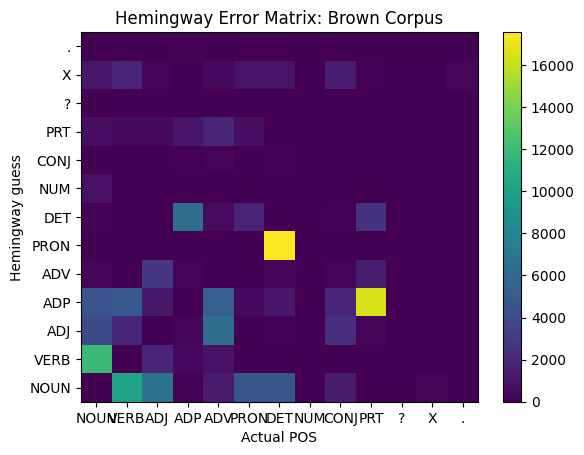

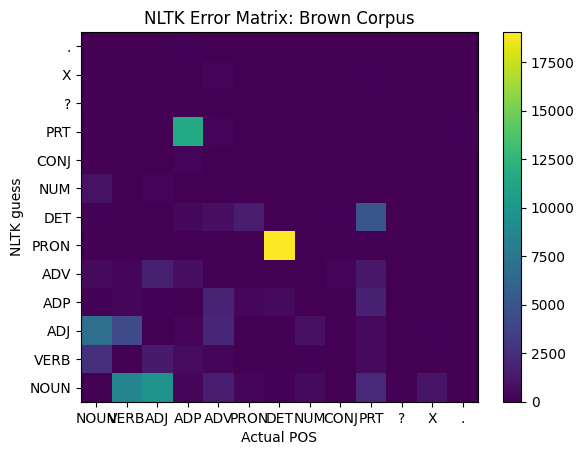

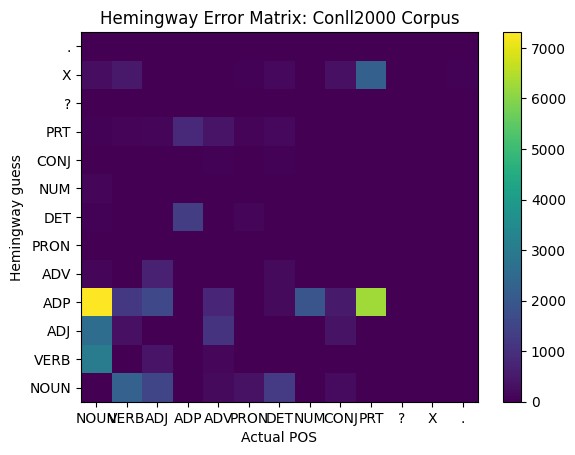

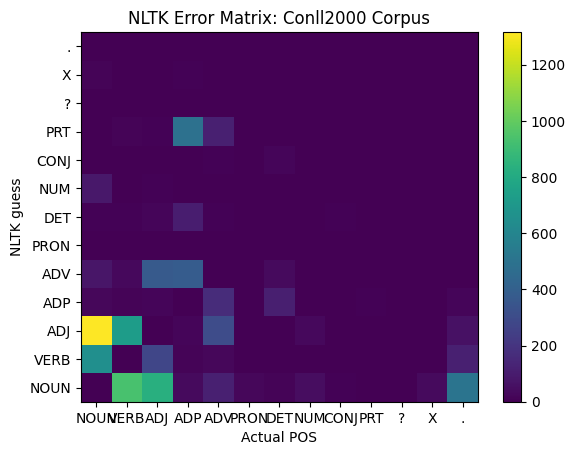

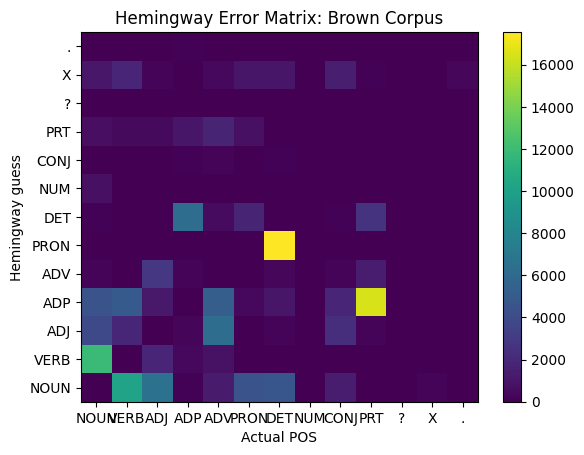

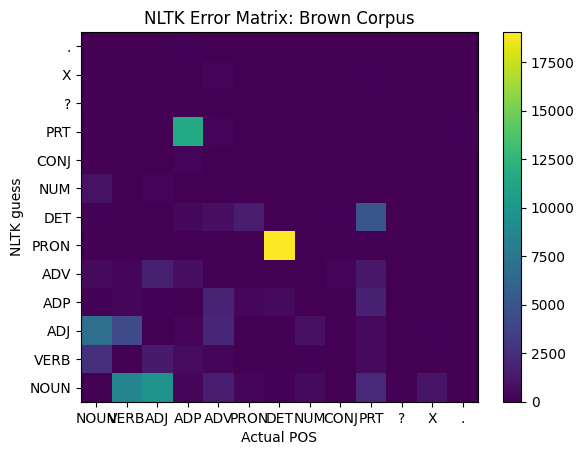

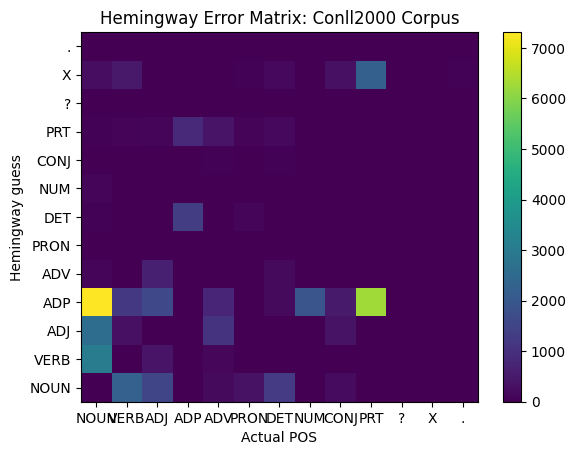

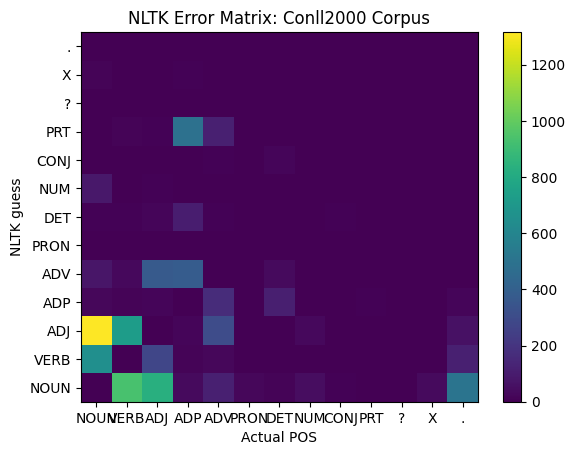

In [11]:
for key in error_matricies:
    print(f"Using {key} distribution for unknown POS")
    plot(error_matricies[key])